# Import Packages

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import PIL
import cv2

# Save Data Folders In Variable

In [2]:
data_dir = os.path.join(os.getcwd(), 'data')
processd_dir = os.path.join(data_dir, 'processed')
high_res_dir = os.path.join(processd_dir, 'high_res')
avg_pool_dir = os.path.join(processd_dir, 'avg_pool/train')
max_pool_dir = os.path.join(processd_dir, 'max_pool/train')
nn_interp_dir = os.path.join(processd_dir, 'NN_interpolation/train')

In [5]:
assert len(os.listdir(high_res_dir)) == len(os.listdir(avg_pool_dir)) == len(os.listdir(max_pool_dir)) == len(os.listdir(nn_interp_dir))
print(len(os.listdir(high_res_dir)))

3538


# Preprocessing
## Split To Train, Test, and Validation Sets

TODO: add shuffling to the trainning, testing and validation sets

In [8]:
def split_train_test_val(data_dir, test_size=0.1, val_size=0.1):
    files = os.listdir(data_dir)
    files = np.array(files)
    test_split = int(len(files)*test_size)
    val_split = int(len(files)*val_size)
    test_files = files[:test_split]
    val_files = files[test_split:test_split+val_split]
    train_files = files[test_split+val_split:]
    return train_files, val_files, test_files

high_res_train, high_res_val, high_res_test = split_train_test_val(high_res_dir, test_size=0.2, val_size=0.2)
avg_pool_train, avg_pool_val, avg_pool_test = split_train_test_val(avg_pool_dir, test_size=0.2, val_size=0.2)
max_pool_train, max_pool_val, max_pool_test = split_train_test_val(max_pool_dir, test_size=0.2, val_size=0.2)
nn_interp_train, nn_interp_val, nn_interp_test = split_train_test_val(nn_interp_dir, test_size=0.2, val_size=0.2)

In [9]:
assert len(high_res_train) == len(avg_pool_train) == len(max_pool_train) == len(nn_interp_train)
assert len(high_res_val) == len(avg_pool_val) == len(max_pool_val) == len(nn_interp_val)
assert len(high_res_test) == len(avg_pool_test) == len(max_pool_test) == len(nn_interp_test)
print(len(high_res_train), len(high_res_val), len(high_res_test))

2124 707 707


In [19]:
def visualize_images(data_dir1, files1, data_dir2, files2, data_dir3, files3, data_dir4, files4, num_images=5):
    fig, axs = plt.subplots(num_images, 4, figsize=(15, 15))
    for i in range(num_images):
        # todo add labels to the images
        axs[i, 0].imshow(PIL.Image.open(os.path.join(data_dir1, files1[i])))
        axs[i, 1].imshow(PIL.Image.open(os.path.join(data_dir2, files2[i])))
        axs[i, 2].imshow(PIL.Image.open(os.path.join(data_dir3, files3[i])))
        axs[i, 3].imshow(PIL.Image.open(os.path.join(data_dir4, files4[i])))

    plt.show()

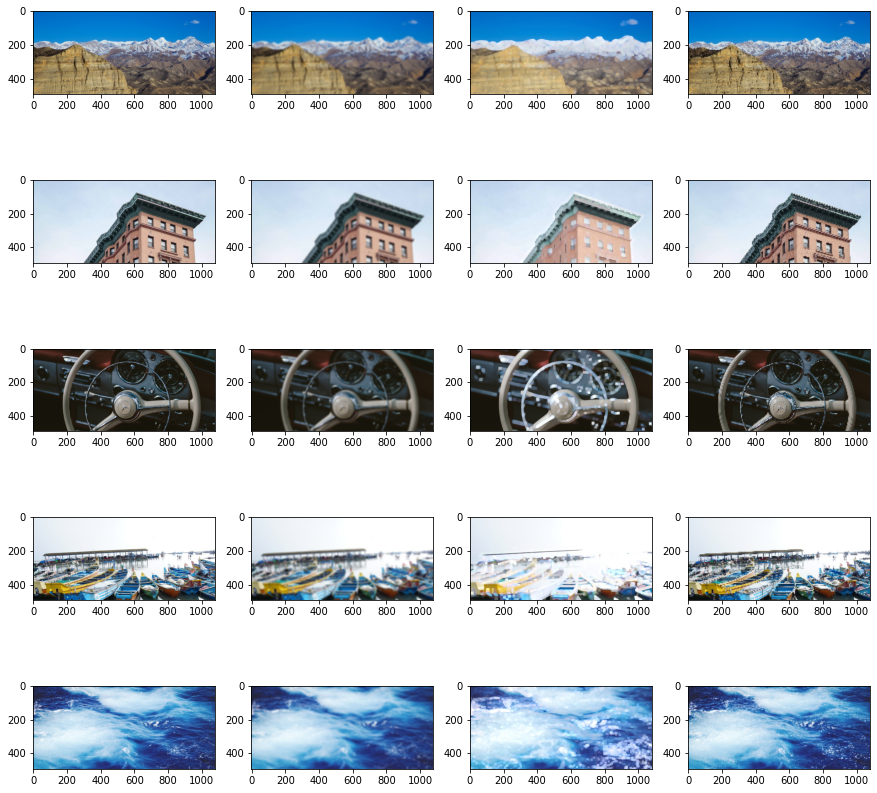

In [20]:
visualize_images(high_res_dir, high_res_train, avg_pool_dir, avg_pool_train, max_pool_dir, max_pool_train, nn_interp_dir, nn_interp_train)

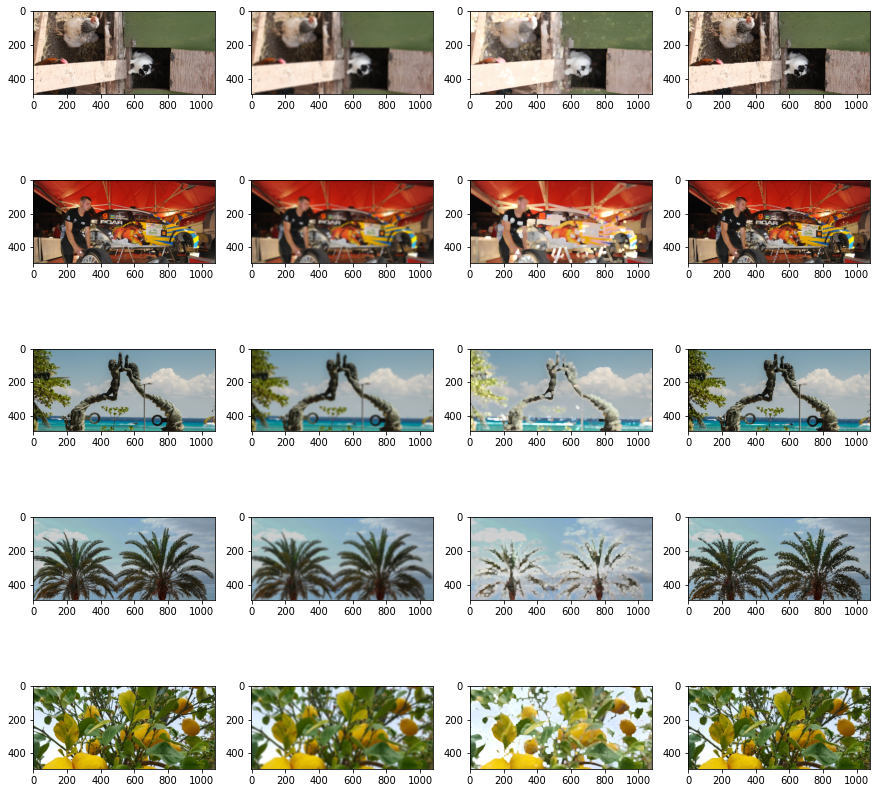

In [21]:
visualize_images(high_res_dir, high_res_val, avg_pool_dir, avg_pool_val, max_pool_dir, max_pool_val, nn_interp_dir, nn_interp_val)

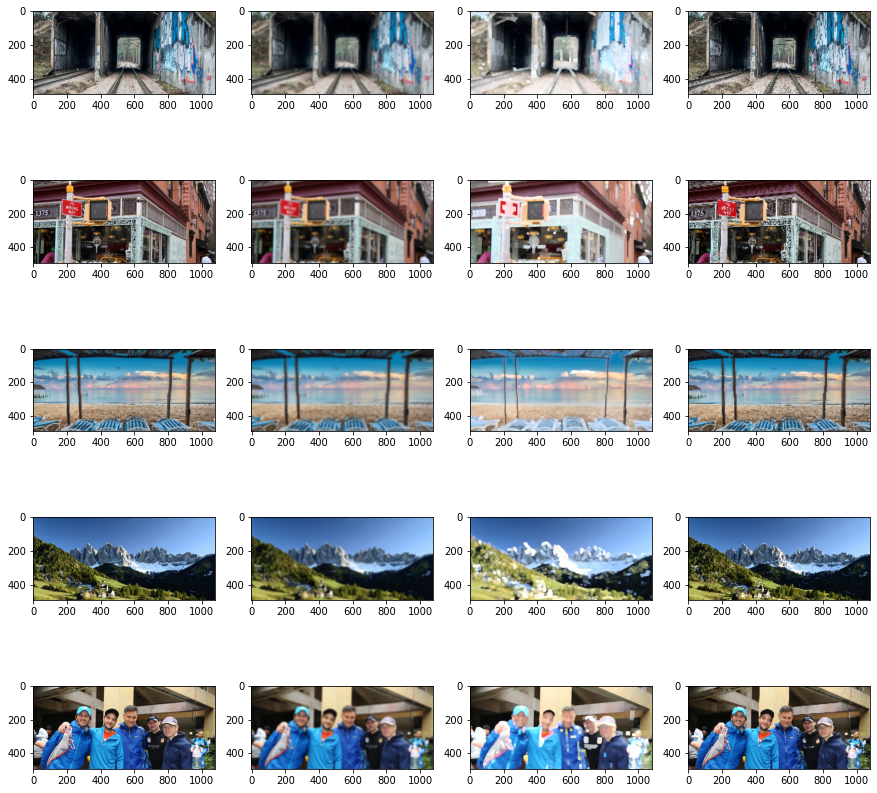

In [22]:
visualize_images(high_res_dir, high_res_test, avg_pool_dir, avg_pool_test, max_pool_dir, max_pool_test, nn_interp_dir, nn_interp_test)

In [28]:
def load_image(dir_name, image_file):
    # load images with cv2
    image = cv2.imread(os.path.join(dir_name, image_file))
    # convert to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # convert to float32
    image = image.astype(np.float32)
    # normalize to [0, 1]
    image = image/255.0
    return image

In [32]:
load_image(high_res_dir, high_res_train[0])

array([[[0.00392157, 0.4       , 0.7607843 ],
        [0.00392157, 0.4       , 0.7607843 ],
        [0.00392157, 0.4       , 0.7607843 ],
        ...,
        [0.        , 0.34901962, 0.7176471 ],
        [0.        , 0.34901962, 0.7176471 ],
        [0.        , 0.34901962, 0.7176471 ]],

       [[0.00392157, 0.4       , 0.7607843 ],
        [0.00392157, 0.4       , 0.7607843 ],
        [0.00392157, 0.4       , 0.7607843 ],
        ...,
        [0.00784314, 0.35686275, 0.7254902 ],
        [0.00784314, 0.35686275, 0.7254902 ],
        [0.00392157, 0.3529412 , 0.72156864]],

       [[0.00392157, 0.4       , 0.7607843 ],
        [0.00392157, 0.4       , 0.7607843 ],
        [0.00392157, 0.4       , 0.7607843 ],
        ...,
        [0.00784314, 0.35686275, 0.7254902 ],
        [0.00784314, 0.35686275, 0.7254902 ],
        [0.00392157, 0.3529412 , 0.72156864]],

       ...,

       [[0.5294118 , 0.42745098, 0.22745098],
        [0.54901963, 0.44705883, 0.24705882],
        [0.5568628 , 0

In [33]:
def load_images(dir_name, files):
    images = []
    for file in files:
        images.append(load_image(dir_name, file))
    return images

In [34]:
train_high_res = load_images(high_res_dir, high_res_train)

In [ ]:
test_high_res = load_images(high_res_dir, high_res_test)
val_high_res = load_images(high_res_dir, high_res_val)

# Models